# HybridMotor Class Usage

Here we explore different features of the HybridMotor class, which is a child class created from parent Motor class.

Let's start by importing the rocketpy module.

In [1]:
from rocketpy import HybridMotor

If you are using Jupyter Notebooks, it is recommended to run the following line to make matplotlib plots which will be shown later interactive and higher quality.

In [2]:
%matplotlib widget

## Thrust Source

The thrust source is of most importance when analyzing parameters such as out of rail velocity, thrust to weight ratio, apogee and many others. Let's create a new motor called example_motor and take a closer look at this functionality.

### Constant Thrust

When passing an `int` or `float` the thrust will be considered constant in time. 

In [3]:
import numpy as np

The final mass of the propellant is assumed to be zero, so a linear extrapolation is used to calculate the position of the center of mass.

In [4]:
example_motor1 = HybridMotor(thrustSource=1500,
                             burnOut=5.4,
                             distanceNozzleMotorReference=1,
                             grainNumber=6,
                             grainDensity=1707,
                             grainOuterRadius=21.40 / 1000,
                             grainInitialInnerRadius=9.65 / 1000,
                             grainInitialHeight=120 / 1000,
                             oxidizerTankRadius=62.5 / 1000,
                             oxidizerTankHeight=600 / 1000,
                             oxidizerInitialPressure=51.03,
                             oxidizerDensity=1.98,
                             oxidizerMolarMass=44.01,
                             oxidizerInitialVolume=62.5 / 1000 * 62.5 / 1000 * np.pi * 600 / 1000,
                             distanceGrainToTank=200 / 1000,
                             injectorArea=3e-05,
)

Let's call the info method to see what kind of information we get.


Motor Details
Total Burning Time: 5.4 s
Total Propellant Mass: 1.423 kg
Distance Nozzle - Motor reference point: 1 m
Propellant Exhaust Velocity: 5691.125 m/s
Average Thrust: 1500.000 N
Maximum Thrust: 1500.0 N at 0.0 s after ignition.
Total Impulse: 8100.000 Ns

Plots


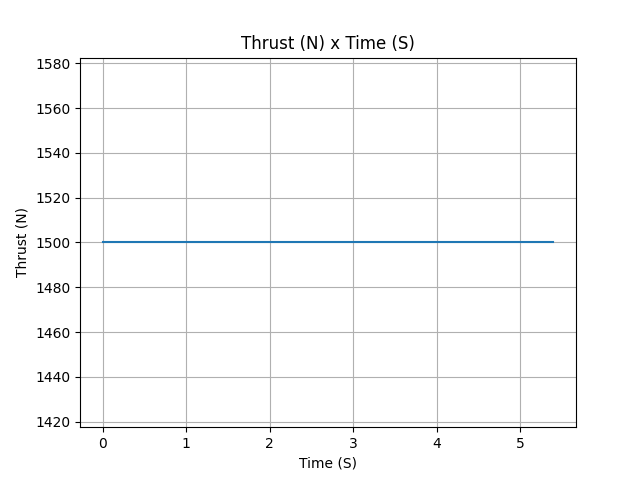

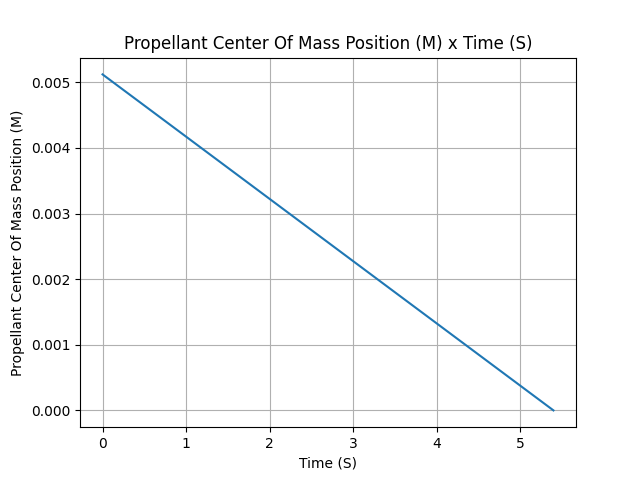

In [5]:
example_motor1.info()

There is valuable information such as Propellant exhaust velocity and Total Impulse being also being displayed. In fact, there is another method called allInfo which outputs even more relevant physical quantities such as grain configuration. Let's try that method also.

Nozzle Details
Nozzle Radius: 0.0335 m
Nozzle Throat Radius: 0.0114 m
Distance Nozzle - Motor reference point: 1 m

Grain Details
Number of Grains: 6
Grain Spacing: 0 m
Grain Density: 1707 kg/m3
Grain Outer Radius: 0.0214 m
Grain Inner Radius: 0.00965 m
Grain Height: 0.12 m
Grain Volume: 0.000 m3
Grain Mass: 0.235 kg

Oxidizer Details
Oxidizer Tank Radius: 0.0625 m
Oxidizer Tank Height: 0.6 m
Oxidizer Initial Pressure: 51.03 atm
Oxidizer Initial Mass: 0.014578953408065134 kg
Oxidizer Density: 1.98 kg/m3
Oxidizer Molar Mass: 44.01 g/mol
Oxidizer Initial Volume: 0.007 m3

Motor Details
Total Burning Time: 5.4 s
Total Propellant Mass: 1.423 kg
Propellant Exhaust Velocity: 5691.125 m/s
Average Thrust: 1500.000 N
Maximum Thrust: 1500.0 N at 0.0 s after ignition.
Total Impulse: 8100.000 Ns

Plots


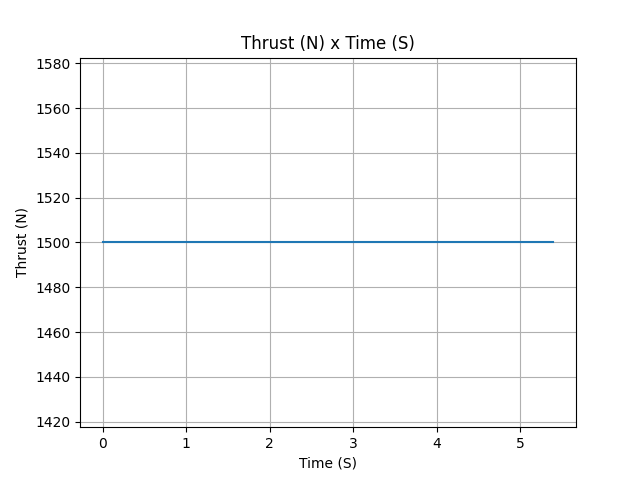

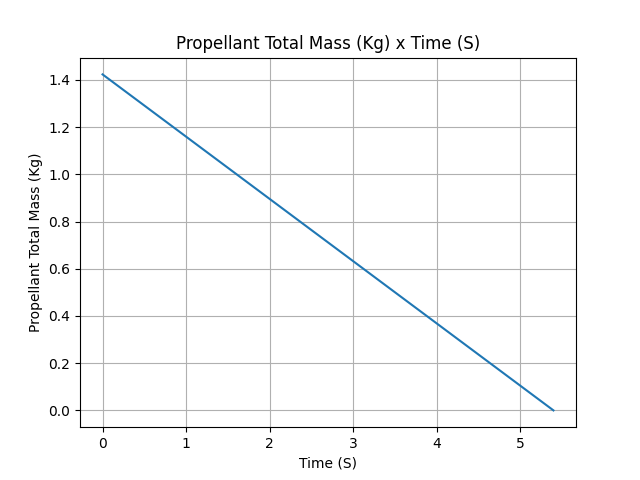

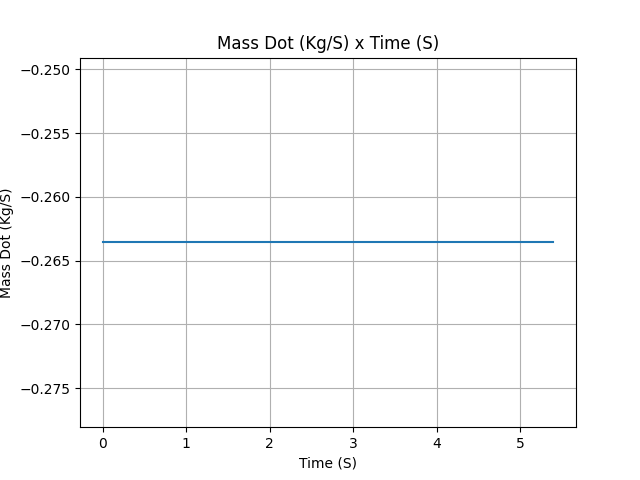

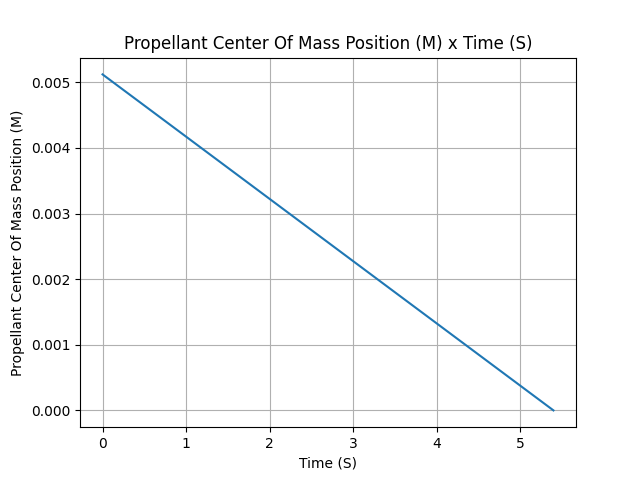

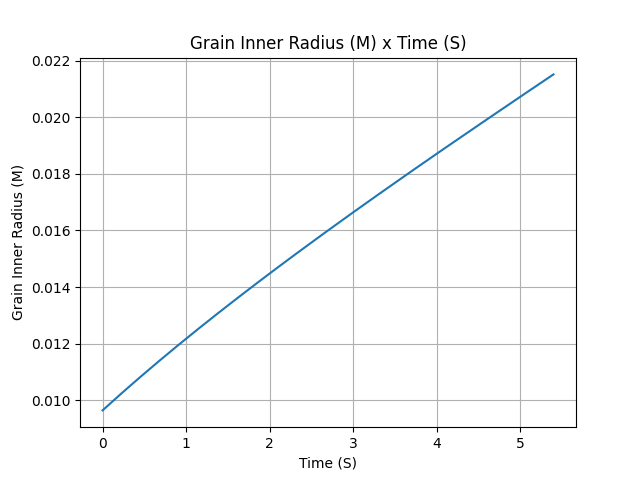

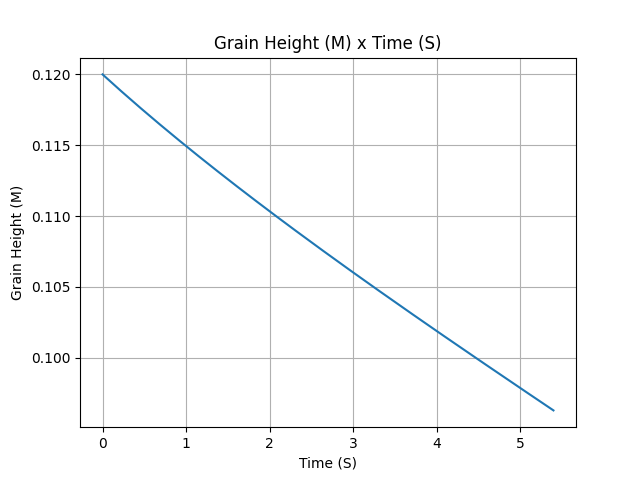

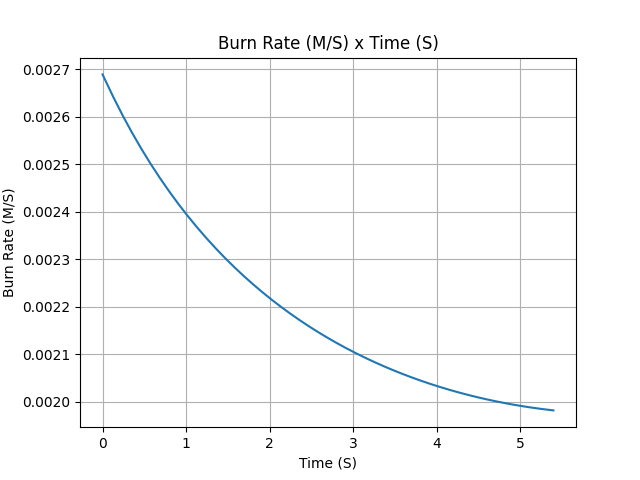

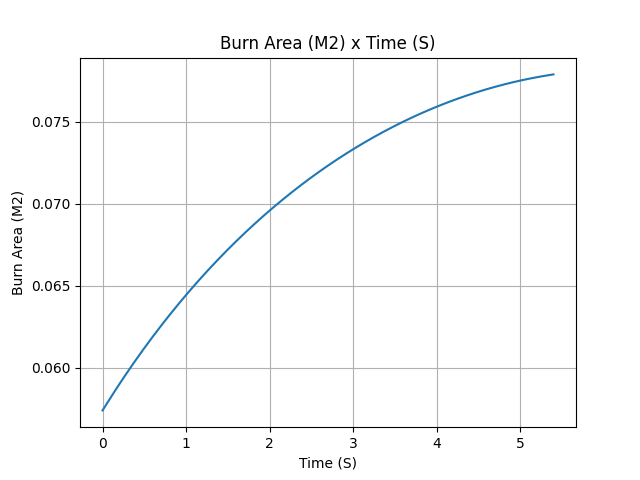

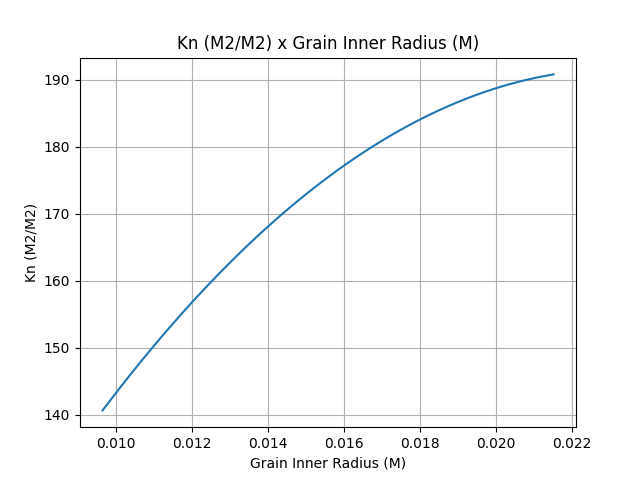

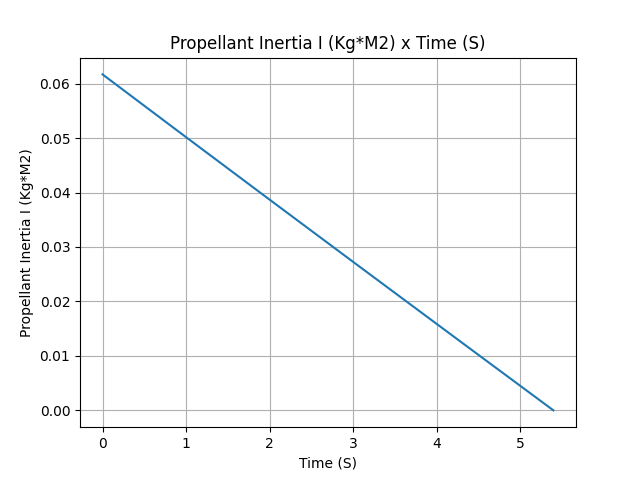

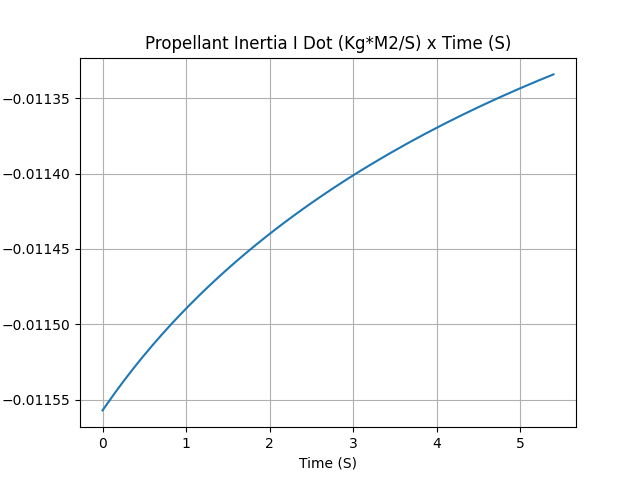

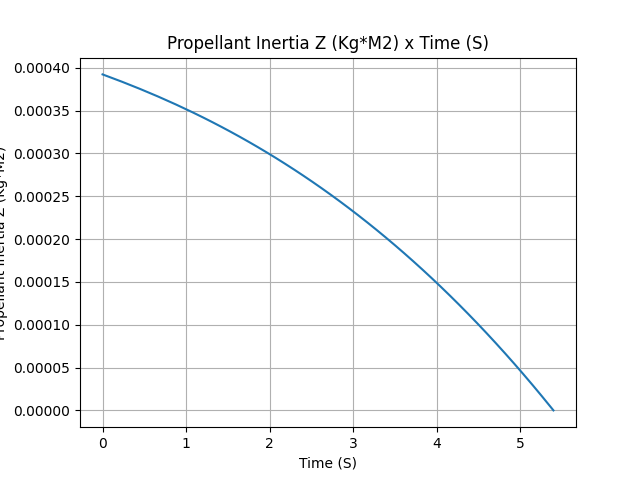

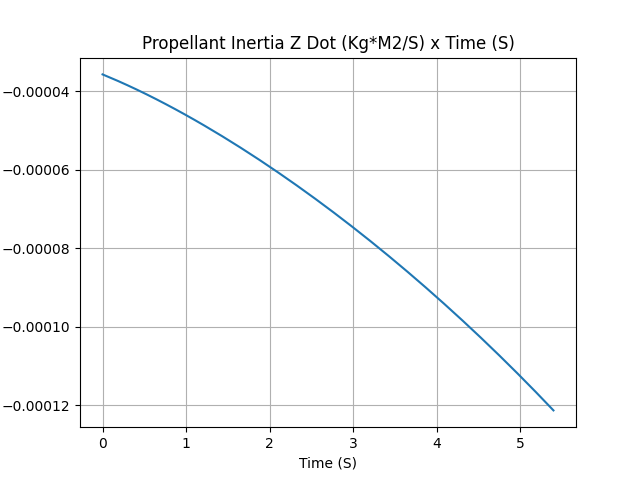

In [6]:
example_motor1.allInfo()

### Eng Files Are Also Supported! (RASP)

Most rocket motors providers share the thrust curve from their motors using the RASP file format (`.eng` files). RocketPy can import such files as the thrust source. Furthermore, if you have a thrust curve in a `.csv` file, RocketPy can also read your data and exported as a `.eng` file.

In [9]:
example_motor2 = HybridMotor(thrustSource="../../data/motors/Hypertek_835CC125J-K240.eng",
                             burnOut=5.4,
                             distanceNozzleMotorReference=1,
                             grainNumber=6,
                             grainDensity=1707,
                             grainOuterRadius=21.40 / 1000,
                             grainInitialInnerRadius=9.65 / 1000,
                             grainInitialHeight=120 / 1000,
                             oxidizerTankRadius=62.5 / 1000,
                             oxidizerTankHeight=600 / 1000,
                             oxidizerInitialPressure=51.03,
                             oxidizerDensity=1.98,
                             oxidizerMolarMass=44.01,
                             oxidizerInitialVolume=62.5 / 1000 * 62.5 / 1000 * np.pi * 600 / 1000,
                             distanceGrainToTank=200 / 1000,
                             injectorArea=3e-05,
)

You can also import .eng files to your simulations. These files are often shared by rocket motors manufacturers and some of them can be downloaded at: https://www.thrustcurve.org/

In case you need, RocketPy can also save any thrust curve into .eng  files so you can export it and use wherever you need.

Nozzle Details
Nozzle Radius: 0.0335 m
Nozzle Throat Radius: 0.0114 m
Distance Nozzle - Motor reference point: 1 m

Grain Details
Number of Grains: 6
Grain Spacing: 0 m
Grain Density: 1707 kg/m3
Grain Outer Radius: 0.0214 m
Grain Inner Radius: 0.00965 m
Grain Height: 0.12 m
Grain Volume: 0.000 m3
Grain Mass: 0.235 kg

Oxidizer Details
Oxidizer Tank Radius: 0.0625 m
Oxidizer Tank Height: 0.6 m
Oxidizer Initial Pressure: 51.03 atm
Oxidizer Initial Mass: 0.014578953408065134 kg
Oxidizer Density: 1.98 kg/m3
Oxidizer Molar Mass: 44.01 g/mol
Oxidizer Initial Volume: 0.007 m3

Motor Details
Total Burning Time: 6.756 s
Total Propellant Mass: 1.423 kg
Propellant Exhaust Velocity: 1012.389 m/s
Average Thrust: 213.277 N
Maximum Thrust: 338.024 N at 0.66 s after ignition.
Total Impulse: 1440.902 Ns

Plots


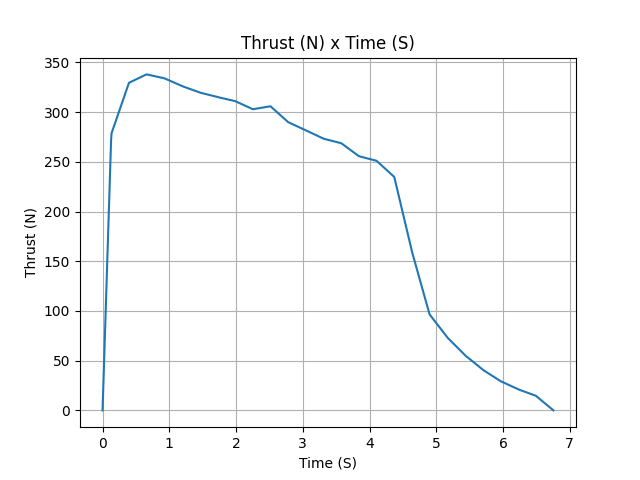

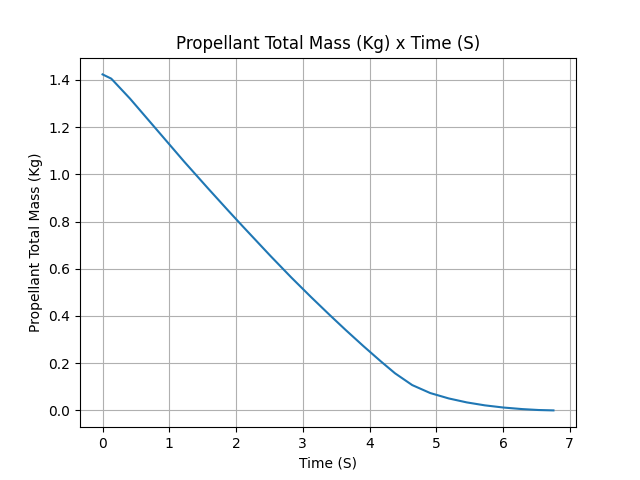

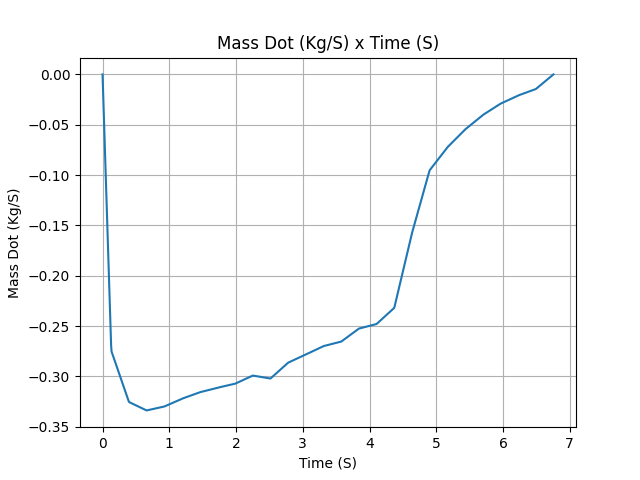

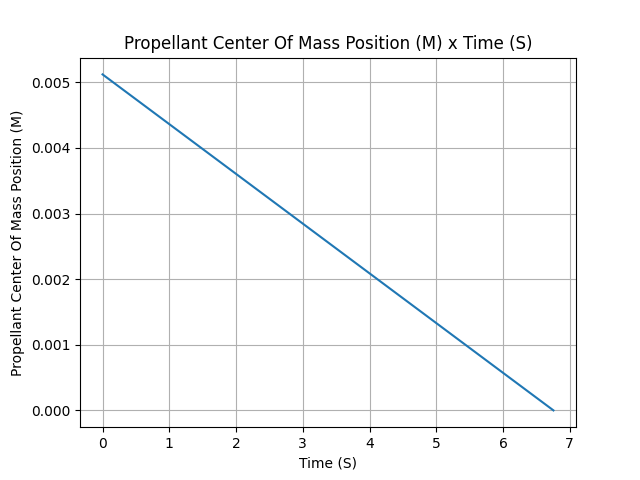

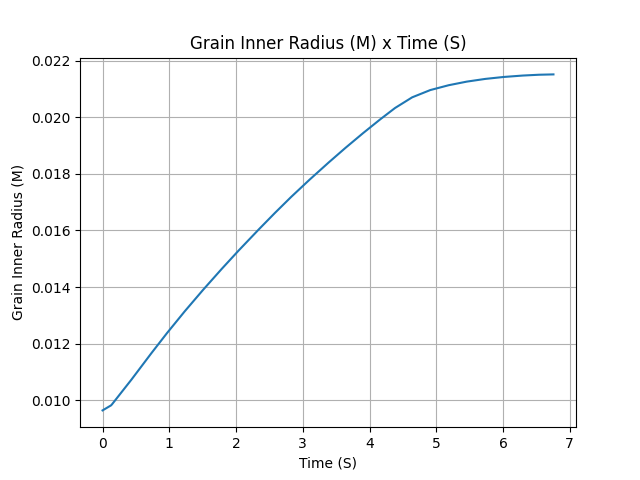

c:\users\guiga\onedrive\documentos\github\rocketpy\rocketpy\Function.py:1050: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


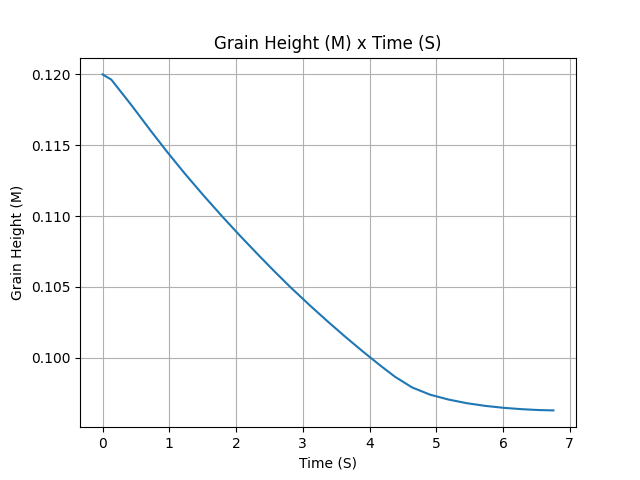

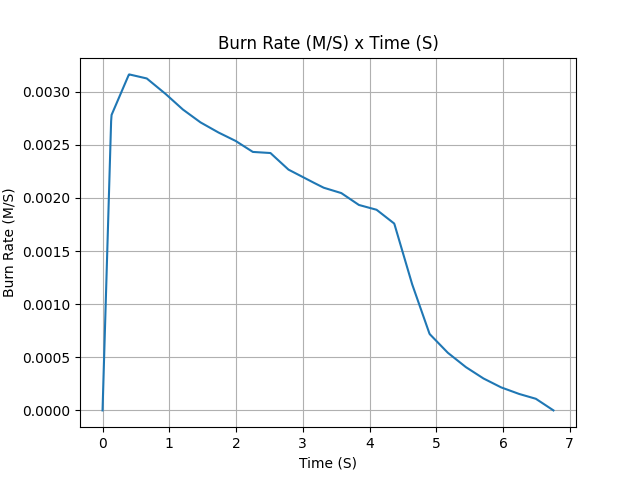

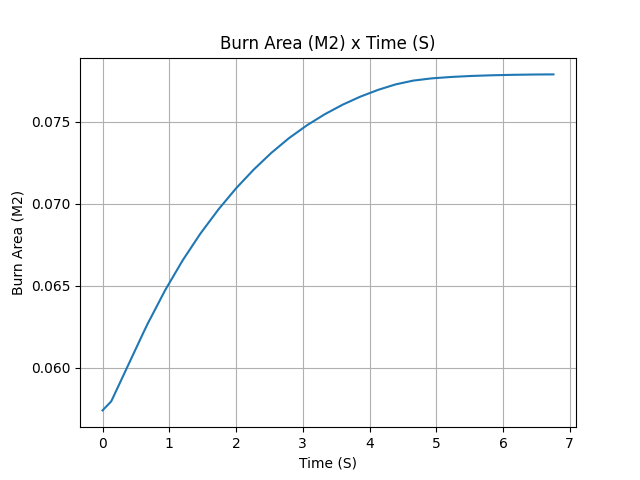

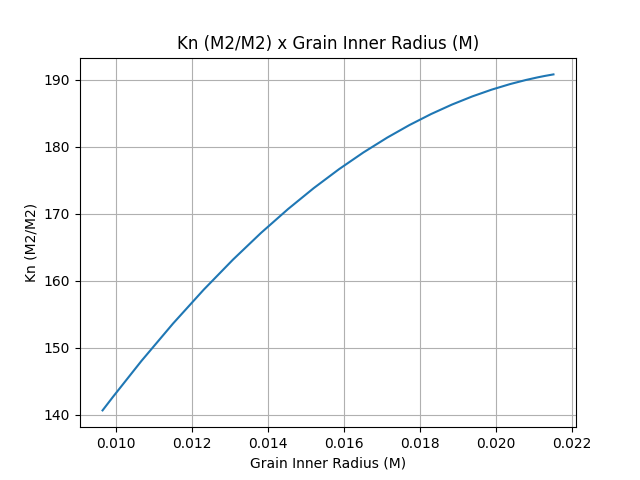

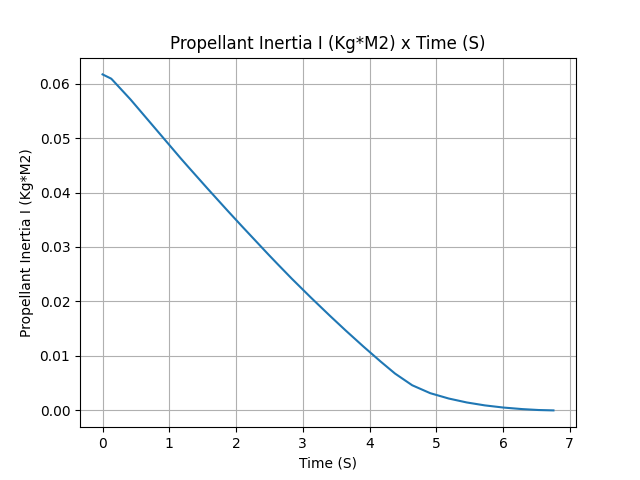

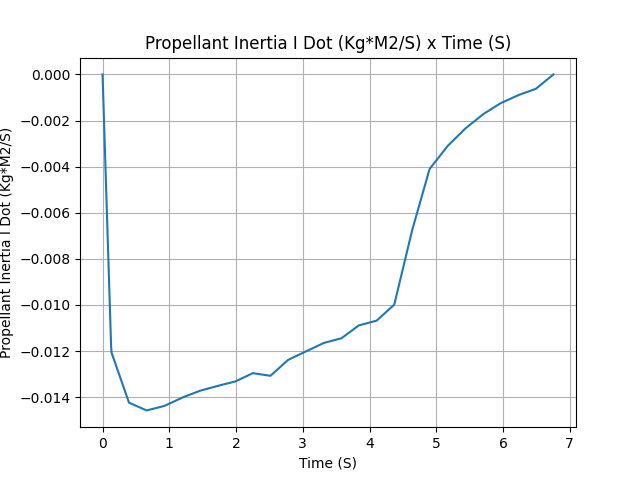

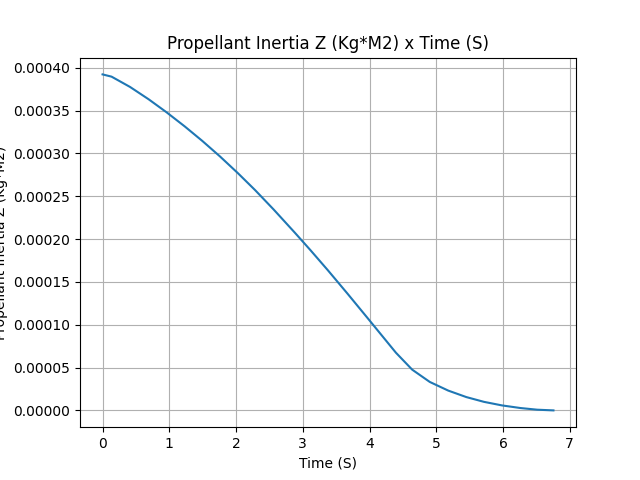

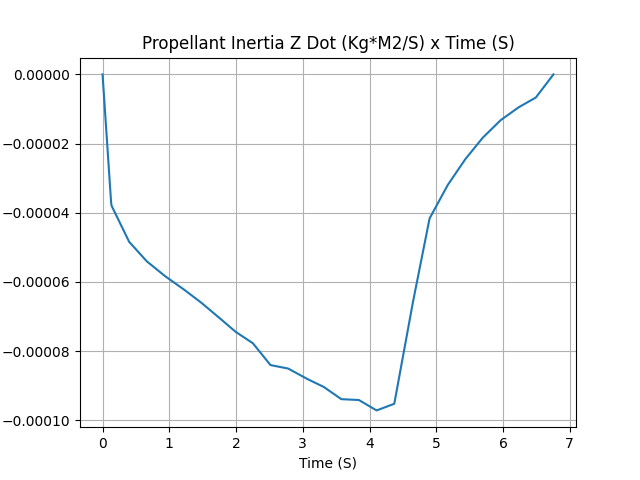

In [10]:
example_motor2.allInfo()

#### One More Option is by using lambda functions...

There is also a third option where one specifies the thrust source parameter by passing a callable function like below.

In [11]:
example_motor3 = HybridMotor(
    thrustSource=lambda x: 1 / (x + 1),
    burnOut=5.4,
    distanceNozzleMotorReference=1,
    grainNumber=6,
    grainDensity=1707,
    grainOuterRadius=21.40 / 1000,
    grainInitialInnerRadius=9.65 / 1000,
    grainInitialHeight=120 / 1000,
    oxidizerTankRadius=62.5 / 1000,
    oxidizerTankHeight=600 / 1000,
    oxidizerInitialPressure=51.03,
    oxidizerDensity=1.98,
    oxidizerMolarMass=44.01,
    oxidizerInitialVolume=62.5 / 1000 * 62.5 / 1000 * np.pi * 600 / 1000,
    distanceGrainToTank=200 / 1000,
    injectorArea=3e-05,
)

Nozzle Details
Nozzle Radius: 0.0335 m
Nozzle Throat Radius: 0.0114 m
Distance Nozzle - Motor reference point: 1 m

Grain Details
Number of Grains: 6
Grain Spacing: 0 m
Grain Density: 1707 kg/m3
Grain Outer Radius: 0.0214 m
Grain Inner Radius: 0.00965 m
Grain Height: 0.12 m
Grain Volume: 0.000 m3
Grain Mass: 0.235 kg

Oxidizer Details
Oxidizer Tank Radius: 0.0625 m
Oxidizer Tank Height: 0.6 m
Oxidizer Initial Pressure: 51.03 atm
Oxidizer Initial Mass: 0.014578953408065134 kg
Oxidizer Density: 1.98 kg/m3
Oxidizer Molar Mass: 44.01 g/mol
Oxidizer Initial Volume: 0.007 m3

Motor Details
Total Burning Time: 5.4 s
Total Propellant Mass: 1.423 kg
Propellant Exhaust Velocity: 1.305 m/s
Average Thrust: 0.344 N
Maximum Thrust: 1.0 N at 0.0 s after ignition.
Total Impulse: 1.857 Ns

Plots


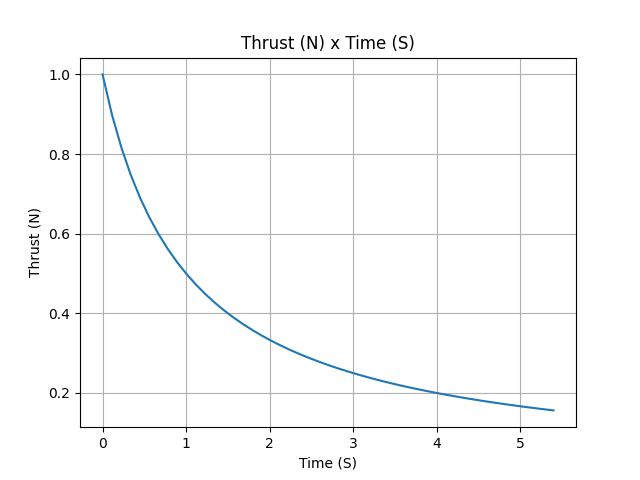

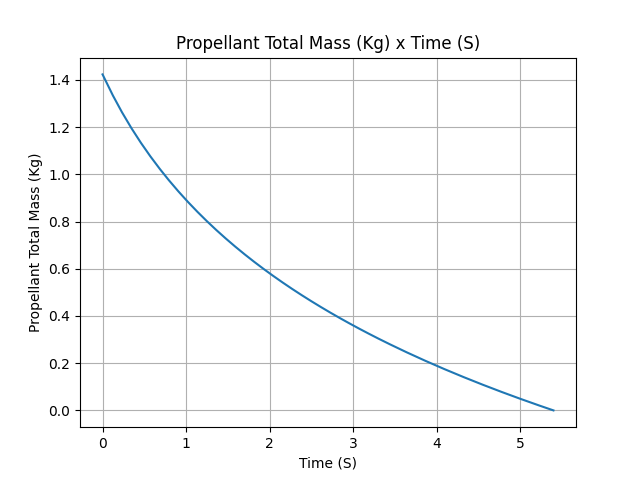

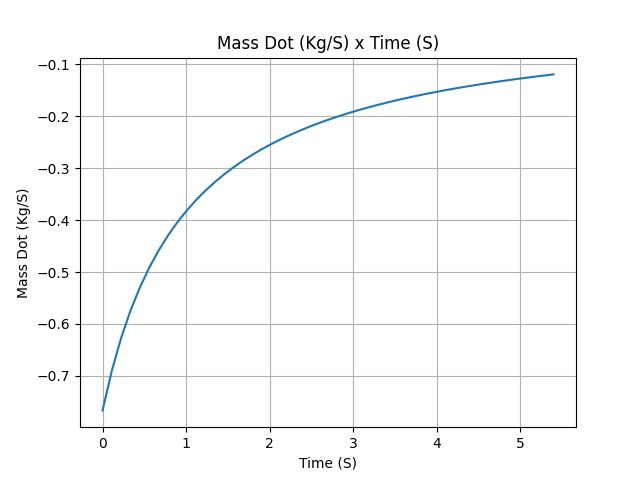

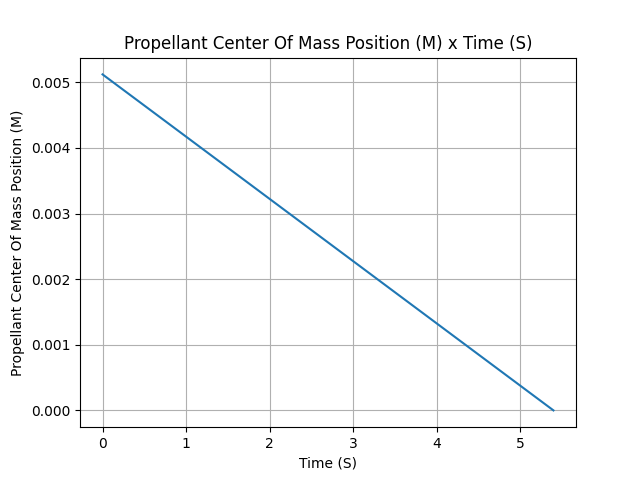

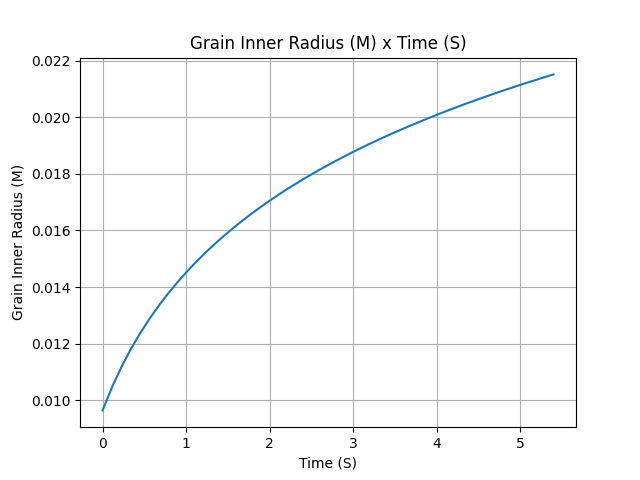

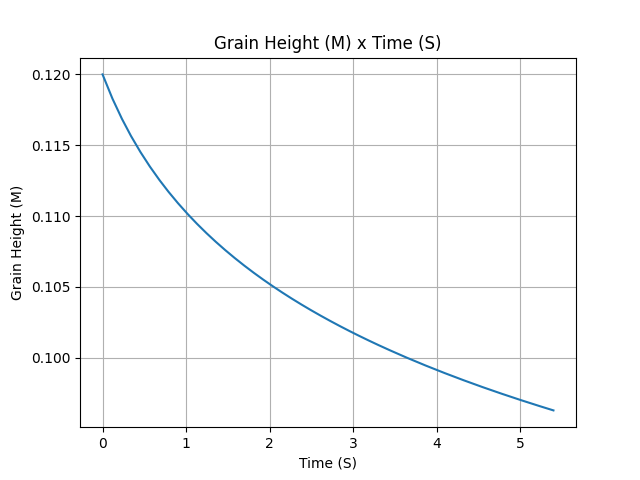

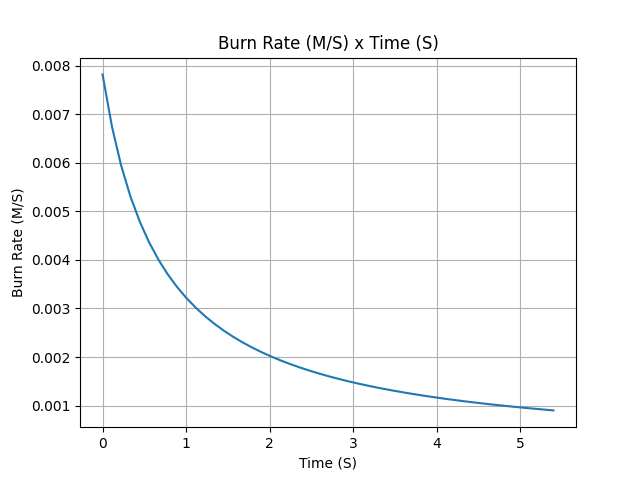

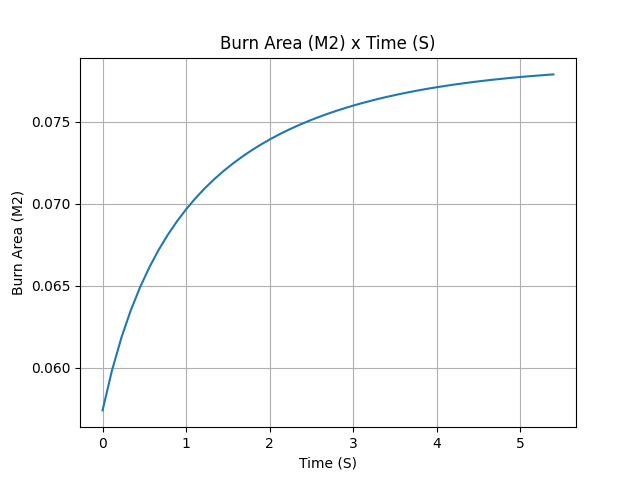

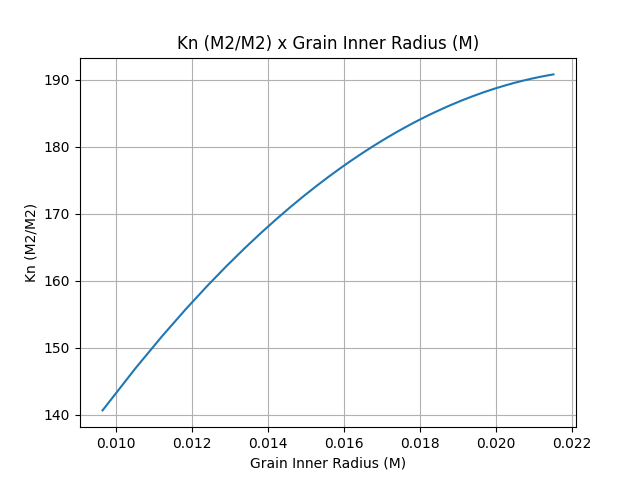

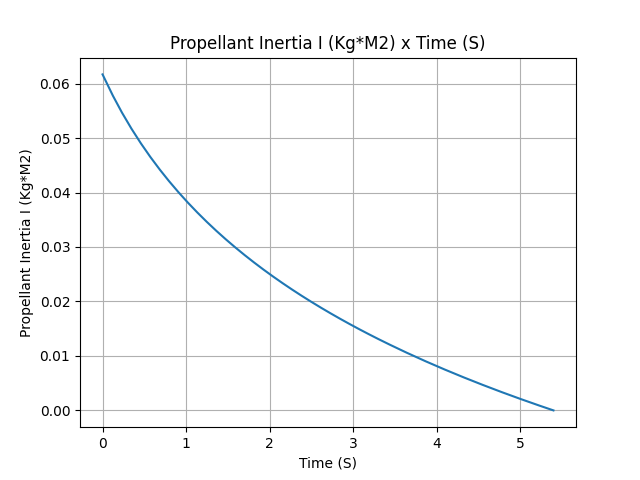

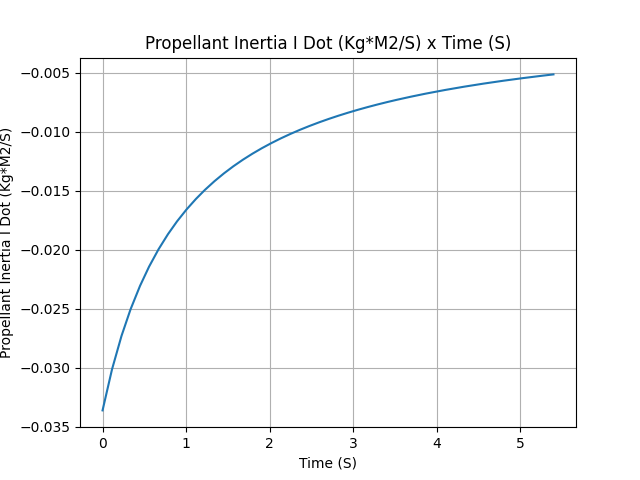

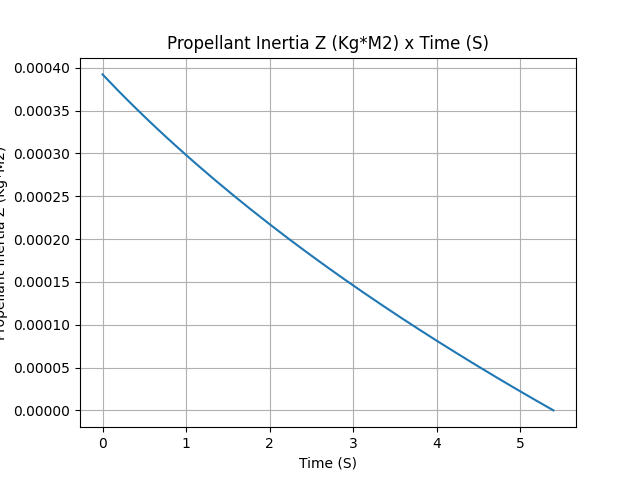

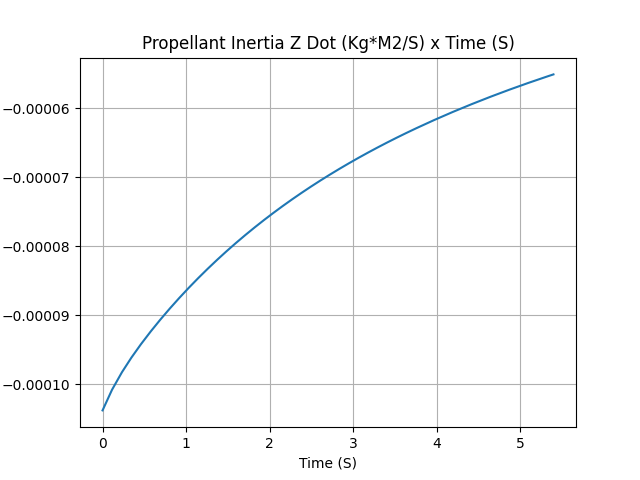

In [12]:
example_motor3.allInfo()

## Key Assumptions and Grain Configurations

One might wonder how some parameters were calculated and what key assumptions were made. Regarding grain configuration one should pay close attention to the fact that only BATES grain configuration is supported. 

The final mass of the propellant is assumed to be zero, so a linear extrapolation is used to calculate the position of the center of mass.